A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age: Customer's Age in Years
- Gender: Customer Gender - M=Male, F=Female
- Dependant_count: Number of dependents
- Education_Level: Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Married, Single, Divorced, Unknown
- Income_Category: Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, >
- Card_Category: Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio: Average Card Utilization Ratio


Tema: Predviđanje otkazivanja usluga klijenata kreditnih kartica.

Uključivanje biblioteka:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

Priprema podataka

Ucitavanje podataka:

In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)
df = df.drop('CLIENTNUM', axis=1)
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Provera i izbacivanje duplikata iz data seta:

In [3]:
print(df.shape)
dups = df.duplicated()
print(dups[dups == True])
data = df.drop_duplicates()
print(data.shape)

(10127, 20)
Series([], dtype: bool)
(10127, 20)


Provera da li postoje null vrednosti

In [4]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
data.describe(include='all')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [6]:

numerical_columns = [
    "Customer_Age", "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", 
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

categorical_columns = [
    "Attrition_Flag", "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"
]

Vizualizacija kategoričkih vičera

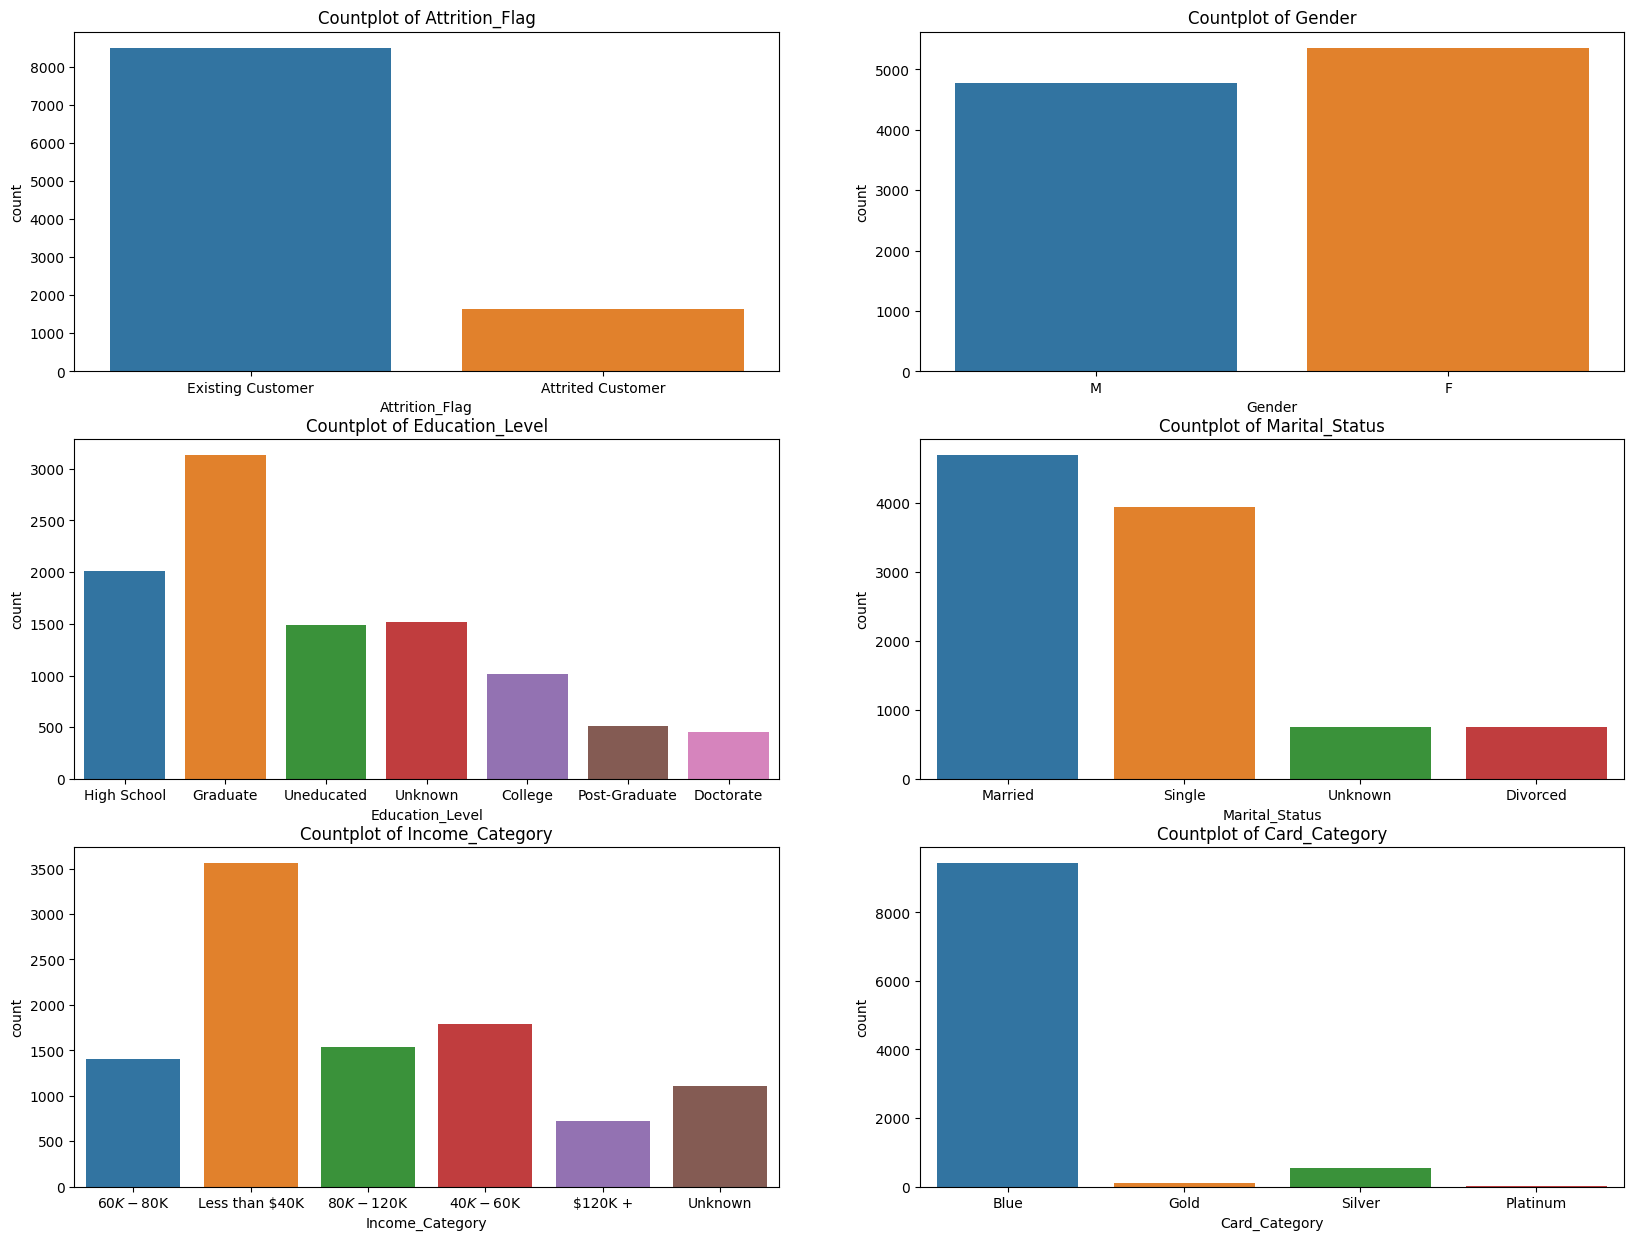

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for i, feature in enumerate(categorical_columns):
    sea.countplot(x=feature, data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Countplot of {feature}')
 
plt.show()

Ono sto smo zakljucili na osnovu vizualizacije podataka:
        - Da su nam najveci broj korisnika sa godisnjom platom manjom od 40k$
        - Da nam najveći broj korisnika koristi Blue kategoriju kartica.
        - I da imamo mali procenat izgubljenih korisnika.

Vizalizacija numeričkih fičera

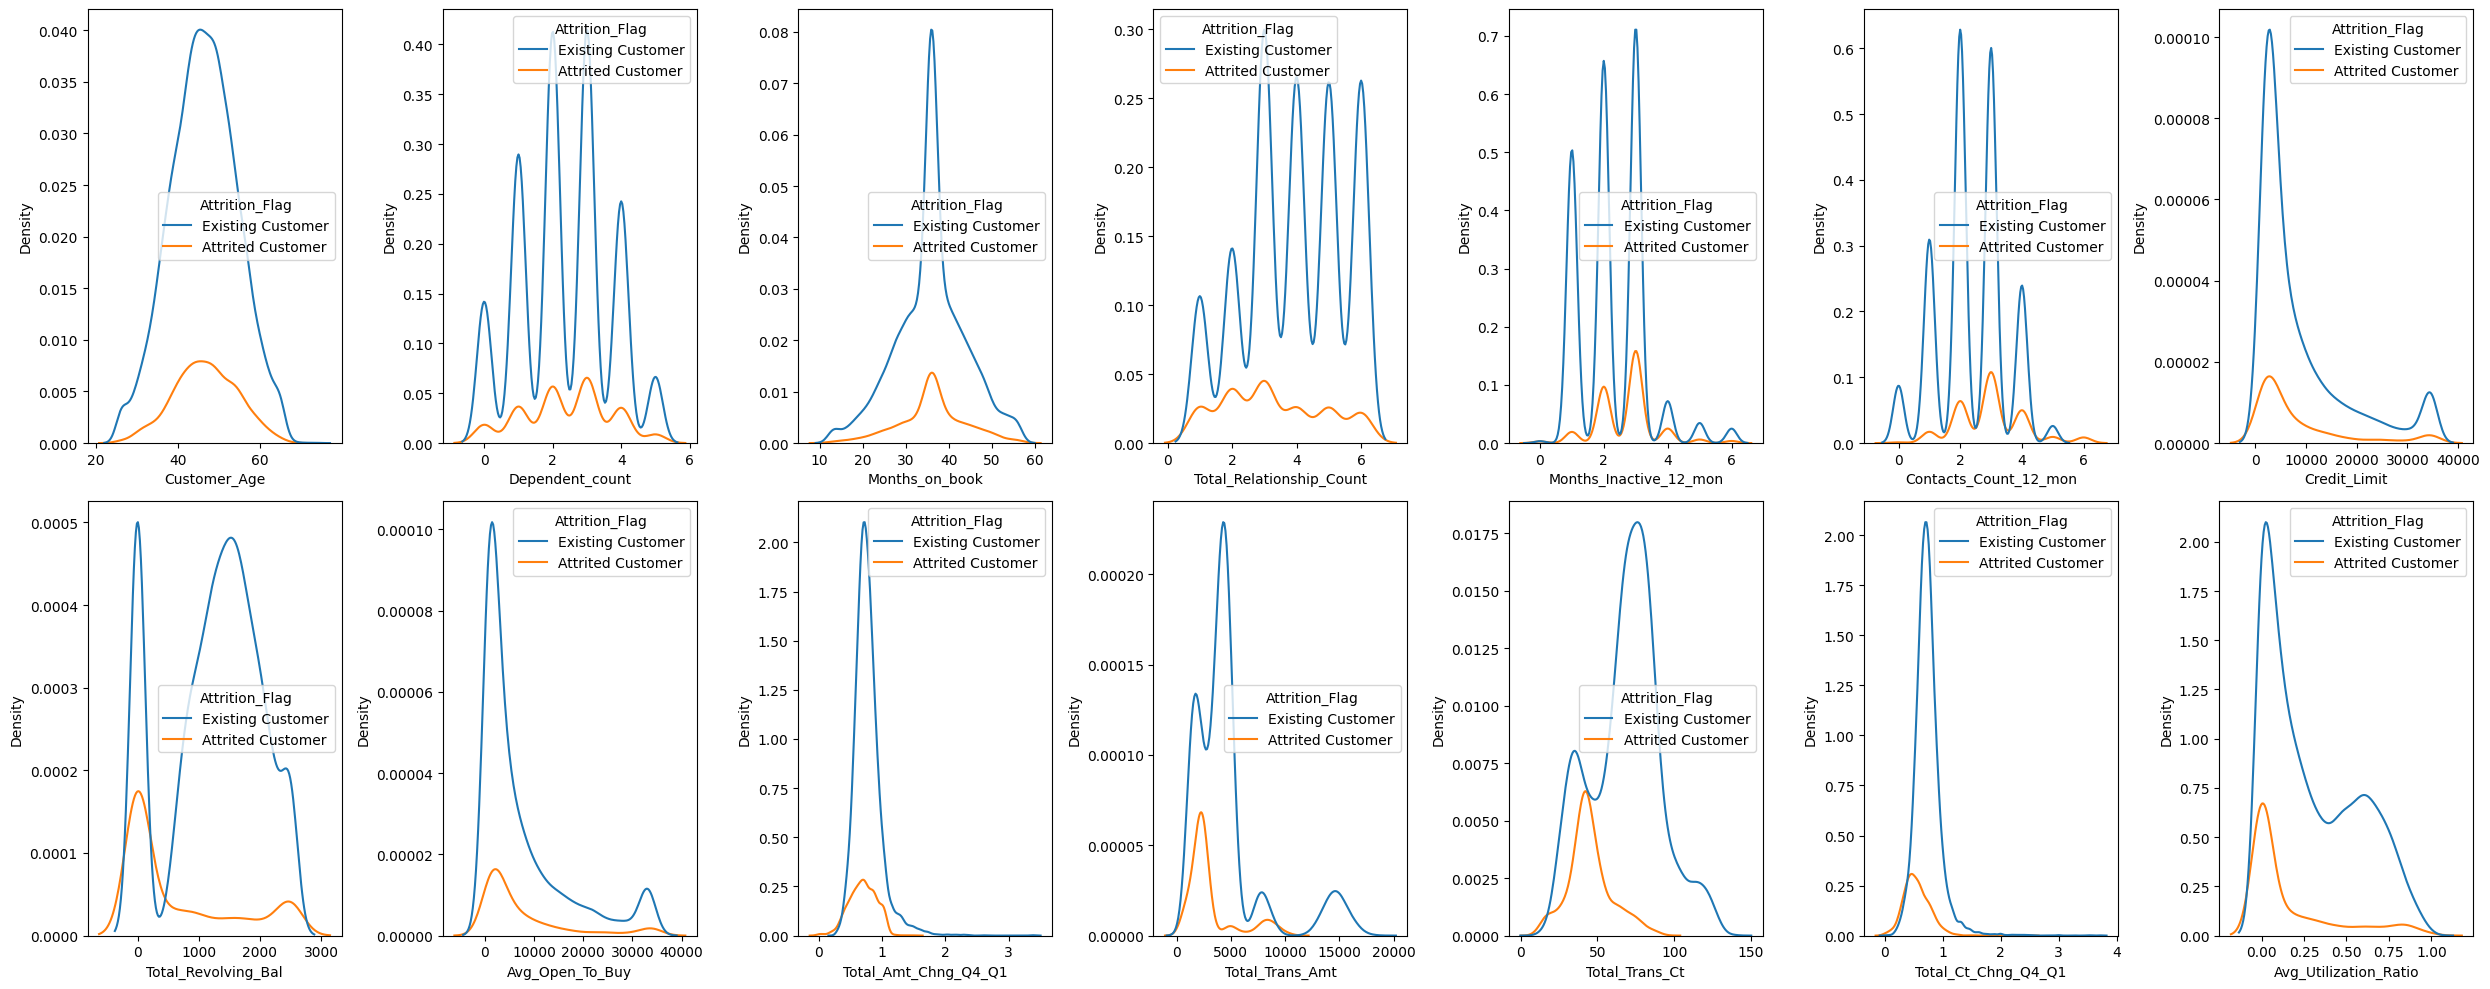

In [8]:
plt.figure(figsize=(25, 10))
for i in range(0, len (numerical_columns)):
    plt.subplot(2, 7, i+1)
    sea.kdeplot(x = df[numerical_columns[i]], hue = df['Attrition_Flag'])
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()



Encoding kategoričkih feature-a.

In [9]:
label_encoder = LabelEncoder()

df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])
print("Attrition_Flag:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df['Gender'] = label_encoder.fit_transform(df['Gender'])
print("Gender:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
print("Education_Level:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])
print("Card_Category:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
print("Income_Category:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
print("Marital_Status:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

df

Attrition_Flag: {'Attrited Customer': 0, 'Existing Customer': 1}
Gender: {'F': 0, 'M': 1}
Education_Level: {'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
Card_Category: {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}
Income_Category: {'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
Marital_Status: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [13]:
scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,-0.165406,1,0.503368,3,1,2,0,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,1,0.333570,0,2.043199,2,2,4,0,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,1,0.583058,1,0.503368,2,1,3,0,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,1,-0.789126,0,1.273283,3,3,4,0,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,1,-0.789126,1,0.503368,5,1,2,0,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,0.458314,1,-0.266547,2,2,1,0,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,0,-0.664382,1,-0.266547,6,0,1,0,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,0,-0.290150,0,-1.036462,3,1,4,0,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,0,-2.036565,1,-0.266547,2,3,1,0,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


In [11]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       327
           1       0.97      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

